# 2. Data Analysis

### Read pickles, analyze speeches, word clouds

In [1]:
# Henter document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,bushjunior,bushsenior,carter,clinton,johnson,kennedy,nixon,obama,reagan,trump
aaron,0,0,0,2,0,0,0,0,0,0
abandon,1,0,1,0,0,1,0,0,0,0
abandoned,0,0,1,0,0,0,0,0,0,0
abandoning,0,0,0,0,0,0,1,0,0,0
abandonment,0,0,0,0,0,1,0,0,0,0


In [2]:
import matplotlib.pyplot as plt

# y = range(0, max(data.loc['great']) + 1)
# title = 'Who says "great" most often? Is it Trump?'
# data.loc['great'].plot.bar(yticks=y, width=0.3, figsize=(8,5), rot=45, fontsize=14, title=title)


common_words = ['great', 'drug', 'wall', 'russia', 'soviet', 'afghanistan']

# Lav subplots for hvert ord
# Henter hvert ord og dets index
for index, word in enumerate(common_words):
    # finder den præsident som siger et ord flest gange, og laver y-aksen fra 0 til max (print if confused :D)
    y = range(0, max(data.loc[word]) + 1)
#     print(y)
    
    title = 'Who says "' + word +'" most often?'
    
    # laver et subplot ud fra en matrix, vi har hardcoded så den altid viser 3 på x-aksen og y-aksen er dynamisk
    # index værdien bruges til at sortere ud fra index
    plt.subplot(len(common_words) // 2, 3, index+1)
    
    # hvis der er mere en 20 på y aksen, sætter vi steps på 5
    if max(data.loc[word]) > 20:
        y = range(0, max(data.loc[word]), 5)
    
    data.loc[word].plot.bar(yticks=y, width=0.3, figsize=(15, 15), rot=90, fontsize=14, title=title)
    plt.tight_layout()
    
plt.show()

<Figure size 1500x1500 with 6 Axes>

In [3]:
# Find top 30 ord sagt af hver præsident
top_dict = {}
# For hver kolonne c, som er et præsidentnavn
for c in data.columns:
    # sorterer værdierne, og tager de 30 øverste
    top = data[c].sort_values(ascending=False).head(30)
    # i top_dict sættes key til præsidentnavn, og value til en liste af tuples med (ord, antal)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'bushjunior': [('america', 30),
  ('people', 29),
  ('congress', 27),
  ('new', 25),
  ('year', 24),
  ('iraq', 21),
  ('american', 19),
  ('help', 18),
  ('nation', 18),
  ('weve', 18),
  ('trust', 17),
  ('terrorists', 14),
  ('world', 13),
  ('forces', 13),
  ('future', 13),
  ('country', 12),
  ('ask', 12),
  ('iraqi', 12),
  ('americans', 11),
  ('hope', 11),
  ('empower', 11),
  ('come', 11),
  ('al', 11),
  ('past', 11),
  ('government', 11),
  ('years', 11),
  ('security', 10),
  ('good', 10),
  ('agreement', 10),
  ('federal', 9)],
 'bushsenior': [('people', 26),
  ('know', 24),
  ('plan', 23),
  ('world', 22),
  ('right', 19),
  ('help', 18),
  ('american', 18),
  ('new', 17),
  ('country', 16),
  ('make', 15),
  ('congress', 14),
  ('health', 13),
  ('time', 13),
  ('good', 12),
  ('tax', 12),
  ('tell', 11),
  ('federal', 11),
  ('government', 10),
  ('america', 10),
  ('pay', 9),
  ('im', 9),
  ('things', 9),
  ('year', 9),
  ('economy', 9),
  ('let', 9),
  ('children', 8

In [4]:
# Print top 15 ord sagt af hver præsident
# for president, top_words in top_dict.items():
#     print(president)
#     print(', '.join([word for word, count in top_words[0:15]]))
#     print('---')

In [5]:
# Kigger på de oftest forekommende ord og tilføjer dem til en stop word liste
from collections import Counter

# Henter top 30 ord for hver præsident, og lægger ind i én lang liste
top_30_words_total = []
for president in data.columns:
    # husk, top_dict er en dict med key, value (præsident, liste af tupler (word, count))
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        top_30_words_total.append(t)
        
top_30_words_total

['america',
 'people',
 'congress',
 'new',
 'year',
 'iraq',
 'american',
 'help',
 'nation',
 'weve',
 'trust',
 'terrorists',
 'world',
 'forces',
 'future',
 'country',
 'ask',
 'iraqi',
 'americans',
 'hope',
 'empower',
 'come',
 'al',
 'past',
 'government',
 'years',
 'security',
 'good',
 'agreement',
 'federal',
 'people',
 'know',
 'plan',
 'world',
 'right',
 'help',
 'american',
 'new',
 'country',
 'make',
 'congress',
 'health',
 'time',
 'good',
 'tax',
 'tell',
 'federal',
 'government',
 'america',
 'pay',
 'im',
 'things',
 'year',
 'economy',
 'let',
 'children',
 'jobs',
 'ask',
 'work',
 'tonight',
 'soviet',
 'world',
 'peace',
 'america',
 'nations',
 'union',
 'states',
 'united',
 'security',
 'military',
 'continue',
 'oil',
 'people',
 'nation',
 'power',
 'preserve',
 'energy',
 'time',
 'east',
 'region',
 'afghanistan',
 'meet',
 'challenge',
 'national',
 'middle',
 'congress',
 'help',
 'forces',
 'new',
 'american',
 'new',
 'ask',
 'people',
 'make',


In [6]:
# Her er listen over de oftest forekommende ord og hvor mange af præsidenterne der har ordet på deres top 30 af ord
Counter(top_30_words_total).most_common()

[('american', 10),
 ('world', 10),
 ('america', 9),
 ('people', 9),
 ('year', 9),
 ('congress', 8),
 ('new', 8),
 ('years', 8),
 ('nation', 7),
 ('americans', 7),
 ('time', 7),
 ('make', 6),
 ('help', 5),
 ('country', 5),
 ('work', 5),
 ('tonight', 5),
 ('peace', 5),
 ('united', 5),
 ('just', 5),
 ('government', 4),
 ('security', 4),
 ('federal', 4),
 ('nations', 4),
 ('states', 4),
 ('weve', 3),
 ('future', 3),
 ('ask', 3),
 ('know', 3),
 ('tax', 3),
 ('let', 3),
 ('want', 3),
 ('need', 3),
 ('forces', 2),
 ('hope', 2),
 ('come', 2),
 ('past', 2),
 ('good', 2),
 ('agreement', 2),
 ('right', 2),
 ('health', 2),
 ('im', 2),
 ('economy', 2),
 ('children', 2),
 ('jobs', 2),
 ('union', 2),
 ('energy', 2),
 ('national', 2),
 ('believe', 2),
 ('great', 2),
 ('president', 2),
 ('budget', 2),
 ('administration', 2),
 ('going', 2),
 ('free', 2),
 ('defense', 2),
 ('freedom', 2),
 ('today', 2),
 ('economic', 2),
 ('ago', 2),
 ('americas', 2),
 ('like', 2),
 ('iraq', 1),
 ('trust', 1),
 ('terrori

In [7]:
# Hvis mere end 5 præsidenter har et ord, ekskluderes ordet her som et stop word
add_stop_words = [word for word, count in Counter(top_30_words_total).most_common() if count > 5]
print(add_stop_words)
# her er vores egen liste over stop words, som er nødvendig for at word clouds giver mening.
add_stop_words += ['make', 'time', 'just', 'weve', 'come', 'let', 'im', 'like', 'going', 'ago', 'tell', 'al']
add_stop_words += ['new', 'year', 'thats', 'lets', 'know', 'ask', 'tonight', 'think', 'united', 'states', 'need', 'want']
add_stop_words += ['plan', 'right', 'country', 'believe', 'decades', 'thank', 'help', 'thing', 'dont', 'did', 'day', 'good']
add_stop_words += ['president', 'hope']


['american', 'world', 'america', 'people', 'year', 'congress', 'new', 'years', 'nation', 'americans', 'time', 'make']


In [8]:
# Nu skal vores document-term matrix opdateres med de nye stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# indlæser clean data fra pickle
data_clean = pd.read_pickle('data_clean.pkl')

# tilføjer nye stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# genskab document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle til senere brug
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [9]:
# Tid til word clouds
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

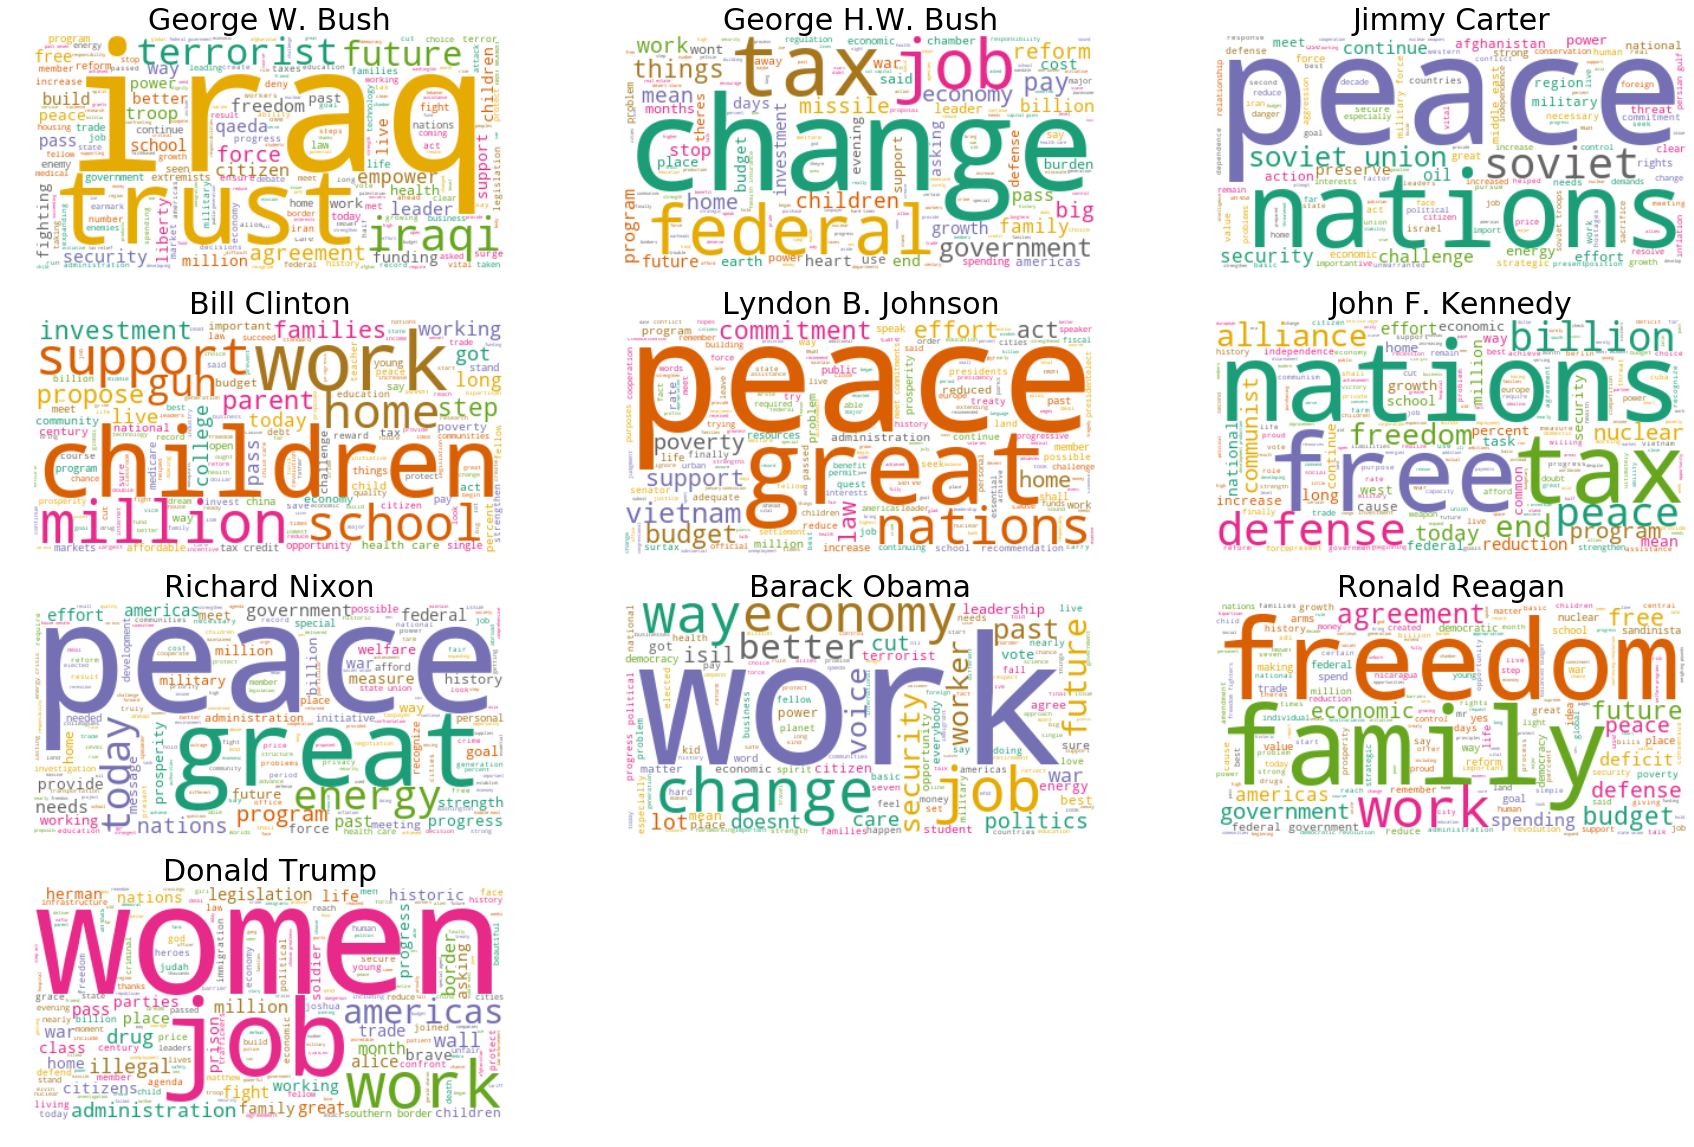

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 20]

full_names = ['George W. Bush', 'George H.W. Bush', 'Jimmy Carter', 'Bill Clinton', 'Lyndon B. Johnson', 'John F. Kennedy', 'Richard Nixon', 'Barack Obama', 'Ronald Reagan', 'Donald Trump']
speech_times = [53, 52, 33, 90, 44, 45, 44, 61, 44, 52]

# Lav subplots for hver president
for index, president in enumerate(data.columns):
    wc.generate(data_clean.transcript[president])
    
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index], fontsize=30)
    
plt.show()

In [11]:
# Find antal unikke ord some hver præsident bruger

# Identificer non-zero items i document-term matrix, altså ord som optræder mindst en gang
unique_list = []
for president in data.columns:
    uniques = data[president].nonzero()[0].size
    unique_list.append(uniques)

# Lav en ny dataframe som indeholder de unikke ord
data_words = pd.DataFrame(list(zip(full_names, speech_times, unique_list)), columns=['president', 'speech_time', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,president,speech_time,unique_words
2,Jimmy Carter,33,822
4,Lyndon B. Johnson,44,950
6,Richard Nixon,44,968
8,Ronald Reagan,44,1159
1,George H.W. Bush,52,1170
7,Barack Obama,61,1378
5,John F. Kennedy,45,1387
9,Donald Trump,52,1393
0,George W. Bush,53,1395
3,Bill Clinton,90,1679


In [12]:
# Udregn ord pr. minut for hver præsident ud fra speech time og total words

# find det totale antal ord først
total_list = []
for president in data.columns:
    totals = sum(data[president])
    total_list.append(totals)
    
# # Speech length i minutter
# speech_times = [53, 52, 33, 90, 44, 45, 44, 61, 44, 52]

# Tilføj columns til vores dataframe, med de informationer vi skal bruge
data_words['total_words'] = total_list
data_words['speech_times'] = speech_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['speech_times']

# Sortere dataframen udfra ord pr. minut for at se hvem der snakker hurtigst og langsomst
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,president,speech_time,unique_words,total_words,speech_times,words_per_minute
1,George H.W. Bush,52,1170,2252,52,43.307692
7,Barack Obama,61,1378,2757,61,45.196721
3,Bill Clinton,90,1679,4252,90,47.244444
2,Jimmy Carter,33,822,1593,33,48.272727
9,Donald Trump,52,1393,2535,52,48.750000
6,Richard Nixon,44,968,2150,44,48.863636
8,Ronald Reagan,44,1159,2240,44,50.909091
0,George W. Bush,53,1395,2819,53,53.188679
5,John F. Kennedy,45,1387,2493,45,55.400000
4,Lyndon B. Johnson,44,950,3366,44,76.500000


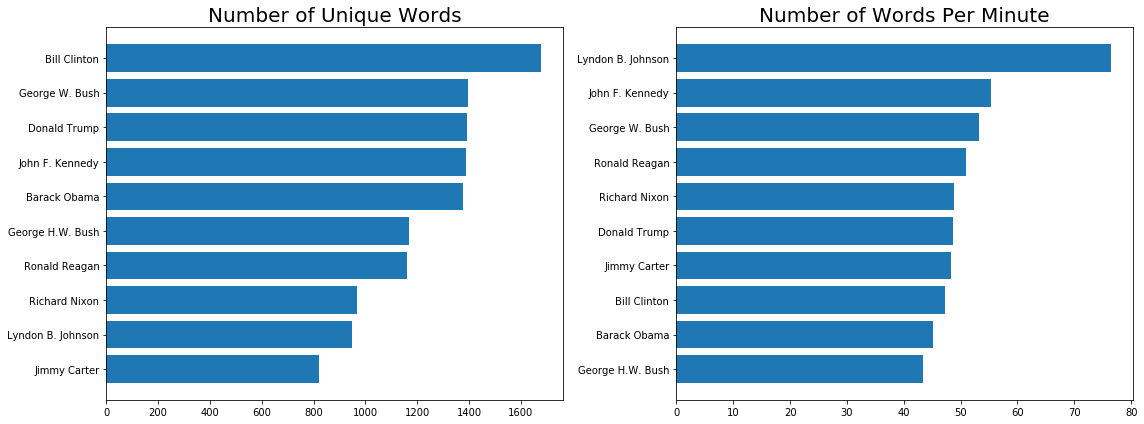

In [15]:
# Så plotter vi unikke ord og ord pr. minut
import numpy as np

y_pos = np.arange(len(data_words))
plt.rcParams['figure.figsize'] = [16, 6]

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.president)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.president)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()


In [14]:
# Her isolerer vi kun ord som handler om america eller soviet

# Her er vores lister med ord som betyder det samme og derfor skal lægges sammen
# listerne er separeret for at de nemmere kan læses
america_list = ['america', 'american', 'usa']
soviet_list = ['soviet', 'communist', 'communism']

# her ligger vi listerne sammen og transposer (bytter plads mellem coloums og rows)
full_list = america_list + soviet_list
data_words = data.transpose()[full_list]

# her plusser vi sammen det antal gange hvert ord er nævnt, da de betyder det samme
# TODO: lav dynamisk istedet for at hardcode

america_list_fixed = data_words.america + data_words.american + data_words.usa
soviet_list_fixed = data_words.soviet + data_words.communist + data_words.communism

# her merger vi de to arrays og lægger dem i en america og en soviet colonne    
data_america_soviet = pd.concat([america_list_fixed, soviet_list_fixed], axis=1)
data_america_soviet.columns = ['america', 'soviet']
data_america_soviet

,america,soviet
bushjunior,50,0
bushsenior,28,4
carter,25,31
clinton,54,2
johnson,34,10
kennedy,14,17
nixon,47,3
obama,49,0
reagan,36,4
trump,49,1
